In [2260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [2261]:
data_file = "conso.txt"

In [2262]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [2263]:
text='test'
filename='text.txt'
#save_text(filename)

In [2264]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [2265]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


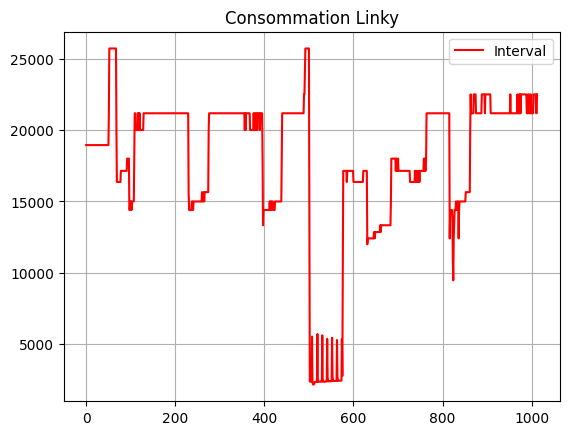

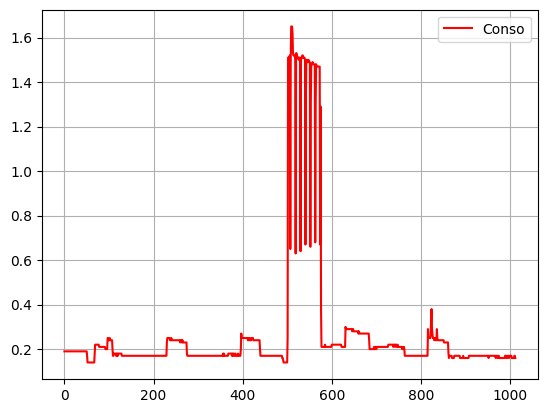

In [2266]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [2267]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [2268]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168873 entries, 0 to 168872
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  168873 non-null  int64  
 1   kWh       168873 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.6 MB


In [2269]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
168868,23193,0.16
168869,21890,0.16
168870,23131,0.16
168871,23751,0.15


<Axes: >

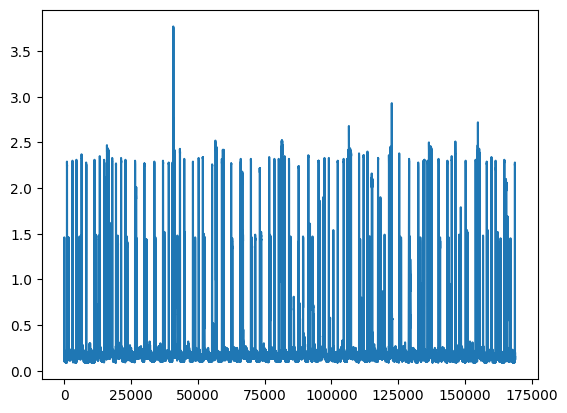

In [2270]:
conso_data['kWh'].plot()

In [2271]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
168868,23193,0.16,23.193,155.219247,4001916596
168869,21890,0.16,21.890,164.458657,4001938486
168870,23131,0.16,23.131,155.635295,4001961617
168871,23751,0.15,23.751,151.572565,4001985368


In [2272]:
# index dernier echantillon
l=len(conso_data)-1
l

168872

In [2273]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4002009058000

In [2274]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 47, 23, 40098)

In [2275]:
old

False

In [2276]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168873 entries, 0 to 168872
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   168873 non-null  int64         
 1   kWh        168873 non-null  float64       
 2   sec        168873 non-null  float64       
 3   Wh         168873 non-null  float64       
 4   cumul(ms)  168873 non-null  int64         
 5   dates      168873 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 7.7 MB


In [2277]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:47:49.329098,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:48:15.572098,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:48:41.457098,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:49:07.211098,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:49:32.985098,07/03/2024
...,...,...,...,...,...,...,...
168868,23193,0.16,23.193,155.219247,4001916596,2024-04-22 09:25:59.636098,22/04/2024
168869,21890,0.16,21.890,164.458657,4001938486,2024-04-22 09:26:21.526098,22/04/2024
168870,23131,0.16,23.131,155.635295,4001961617,2024-04-22 09:26:44.657098,22/04/2024
168871,23751,0.15,23.751,151.572565,4001985368,2024-04-22 09:27:08.408098,22/04/2024


In [2278]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:47:49.329098   
 
          days  
 0  07/03/2024  ,
         Interval   kWh    sec          Wh   cumul(ms)  \
 168872     23690  0.15  23.69  151.962854  4002009058   
 
                             dates        days  
 168872 2024-04-22 09:27:32.098098  22/04/2024  )

In [2279]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

C:\Users\jean\AppData\Roaming\Python\Python311\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


('22/04/2024', 4, 2024)

In [2280]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
167728,29084,0.12,29.084,123.779398,3967960280,2024-04-22 00:00:03.320098,22/04/2024
167729,27624,0.13,27.624,130.321460,3967987904,2024-04-22 00:00:30.944098,22/04/2024
167730,26484,0.14,26.484,135.931128,3968014388,2024-04-22 00:00:57.428098,22/04/2024
167731,26860,0.13,26.860,134.028295,3968041248,2024-04-22 00:01:24.288098,22/04/2024
167732,28023,0.13,28.023,128.465903,3968069271,2024-04-22 00:01:52.311098,22/04/2024
...,...,...,...,...,...,...,...
168868,23193,0.16,23.193,155.219247,4001916596,2024-04-22 09:25:59.636098,22/04/2024
168869,21890,0.16,21.890,164.458657,4001938486,2024-04-22 09:26:21.526098,22/04/2024
168870,23131,0.16,23.131,155.635295,4001961617,2024-04-22 09:26:44.657098,22/04/2024
168871,23751,0.15,23.751,151.572565,4001985368,2024-04-22 09:27:08.408098,22/04/2024


In [2281]:
day

'22/04/2024'

In [2282]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:47:49.329098,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:48:15.572098,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:48:41.457098,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:49:07.211098,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:49:32.985098,07/03/2024
...,...,...,...,...,...,...,...
168868,23193,0.16,23.193,155.219247,4001916596,2024-04-22 09:25:59.636098,22/04/2024
168869,21890,0.16,21.890,164.458657,4001938486,2024-04-22 09:26:21.526098,22/04/2024
168870,23131,0.16,23.131,155.635295,4001961617,2024-04-22 09:26:44.657098,22/04/2024
168871,23751,0.15,23.751,151.572565,4001985368,2024-04-22 09:27:08.408098,22/04/2024


In [2283]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [2284]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.142
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.534
11/03/2024,4.544
12/03/2024,3.553
13/03/2024,3.539
14/03/2024,3.656
15/03/2024,3.563


In [2285]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.320284
dtype: float64

In [2286]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.593043
dtype: float64

In [2287]:
filename='conso_par_jour.csv'
df_grp = grouped.count()/1000
df_grp.to_csv(filename)
filename='../conso_par_jour.csv'
df_grp.to_csv(filename)

In [2288]:
df_grp

,kWh
days,
07/03/2024,3.142
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.534
11/03/2024,4.544
12/03/2024,3.553
13/03/2024,3.539
14/03/2024,3.656
15/03/2024,3.563


In [2289]:
#manuel
#day = '11/03/2024'


In [2290]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

1145

In [2291]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
167728,29084,0.12,29.084,123.779398,3967960280,2024-04-22 00:00:03.320098,22/04/2024
167729,27624,0.13,27.624,130.321460,3967987904,2024-04-22 00:00:30.944098,22/04/2024
167730,26484,0.14,26.484,135.931128,3968014388,2024-04-22 00:00:57.428098,22/04/2024
167731,26860,0.13,26.860,134.028295,3968041248,2024-04-22 00:01:24.288098,22/04/2024
167732,28023,0.13,28.023,128.465903,3968069271,2024-04-22 00:01:52.311098,22/04/2024
...,...,...,...,...,...,...,...
168868,23193,0.16,23.193,155.219247,4001916596,2024-04-22 09:25:59.636098,22/04/2024
168869,21890,0.16,21.890,164.458657,4001938486,2024-04-22 09:26:21.526098,22/04/2024
168870,23131,0.16,23.131,155.635295,4001961617,2024-04-22 09:26:44.657098,22/04/2024
168871,23751,0.15,23.751,151.572565,4001985368,2024-04-22 09:27:08.408098,22/04/2024


In [2292]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [2293]:
conso_day.head(1).dates, conso_day.tail(1).dates


(167728   2024-04-22 00:00:03.320098
 Name: dates, dtype: datetime64[ns],
 168872   2024-04-22 09:27:32.098098
 Name: dates, dtype: datetime64[ns])

In [2294]:
conso_day.loc[:,'dates']

167728   2024-04-22 00:00:03.320098
167729   2024-04-22 00:00:30.944098
167730   2024-04-22 00:00:57.428098
167731   2024-04-22 00:01:24.288098
167732   2024-04-22 00:01:52.311098
                    ...            
168868   2024-04-22 09:25:59.636098
168869   2024-04-22 09:26:21.526098
168870   2024-04-22 09:26:44.657098
168871   2024-04-22 09:27:08.408098
168872   2024-04-22 09:27:32.098098
Name: dates, Length: 1145, dtype: datetime64[ns]

In [2295]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_26500\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:3,29084,0.12,29.084,123.779398,3967960280,2024-04-22 00:00:03.320098,22/04/2024
0:0:30,27624,0.13,27.624,130.321460,3967987904,2024-04-22 00:00:30.944098,22/04/2024
0:0:57,26484,0.14,26.484,135.931128,3968014388,2024-04-22 00:00:57.428098,22/04/2024
0:1:24,26860,0.13,26.860,134.028295,3968041248,2024-04-22 00:01:24.288098,22/04/2024
0:1:52,28023,0.13,28.023,128.465903,3968069271,2024-04-22 00:01:52.311098,22/04/2024
...,...,...,...,...,...,...,...
9:25:59,23193,0.16,23.193,155.219247,4001916596,2024-04-22 09:25:59.636098,22/04/2024
9:26:21,21890,0.16,21.890,164.458657,4001938486,2024-04-22 09:26:21.526098,22/04/2024
9:26:44,23131,0.16,23.131,155.635295,4001961617,2024-04-22 09:26:44.657098,22/04/2024


In [2296]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('09:27:39', 1.145)

In [2297]:
conso_jour=len(df['kWh'])

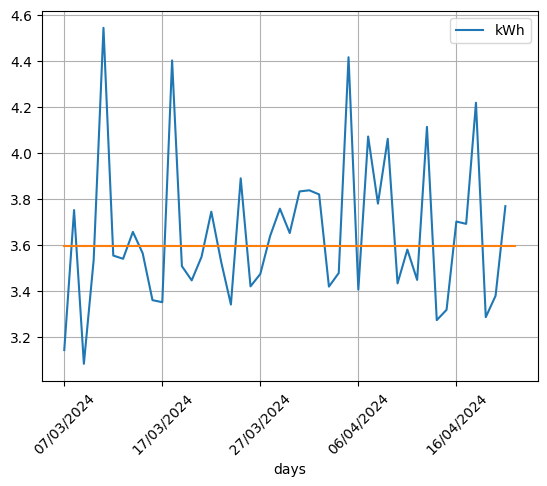

In [2298]:
df_grp.iloc[:-1].plot()#kind='bar')
plt.plot((0,len(df_grp)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


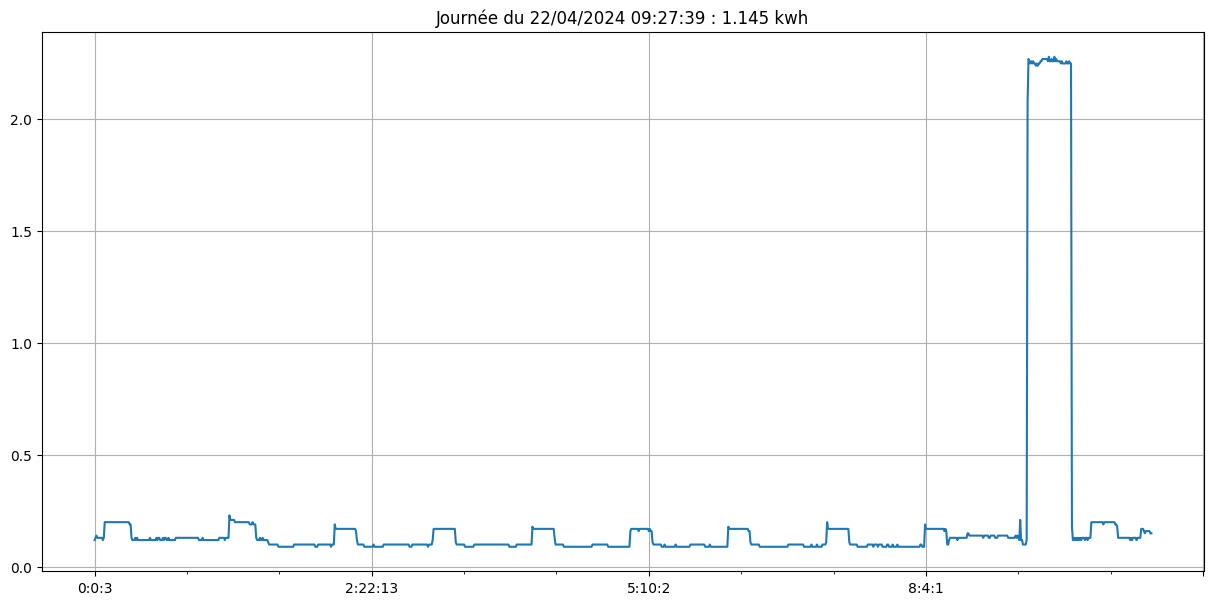

In [2299]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [2300]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [2301]:
df['power']

heure
0:0:3      0.12
0:0:30     0.13
0:0:57     0.14
0:1:24     0.13
0:1:52     0.13
           ... 
9:25:59    0.16
9:26:21    0.16
9:26:44    0.16
9:27:8     0.15
9:27:32    0.15
Name: power, Length: 1145, dtype: float64

<Axes: xlabel='heure'>

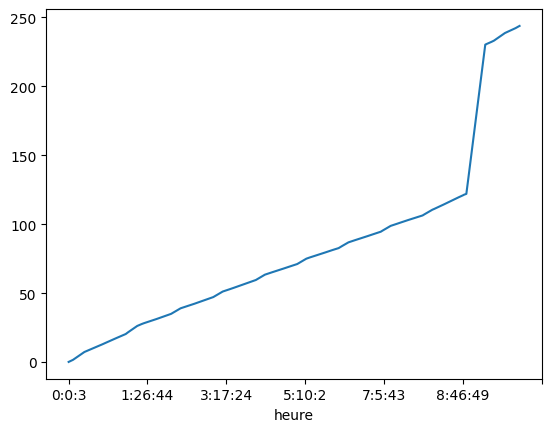

In [2302]:
evo=df['power'].cumsum()
evo.plot()

48

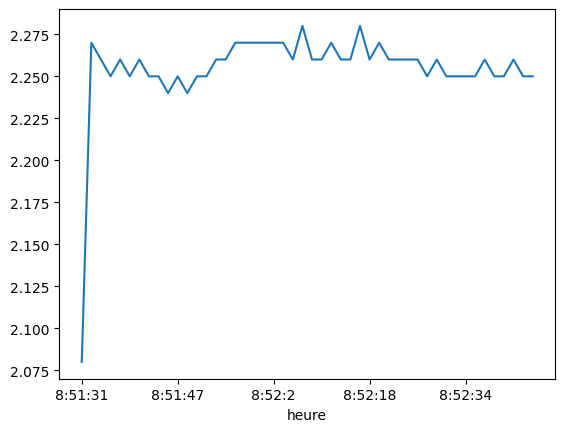

In [2303]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

533

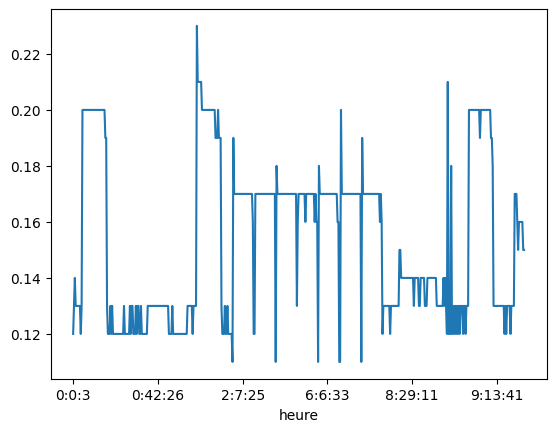

In [2304]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

1097

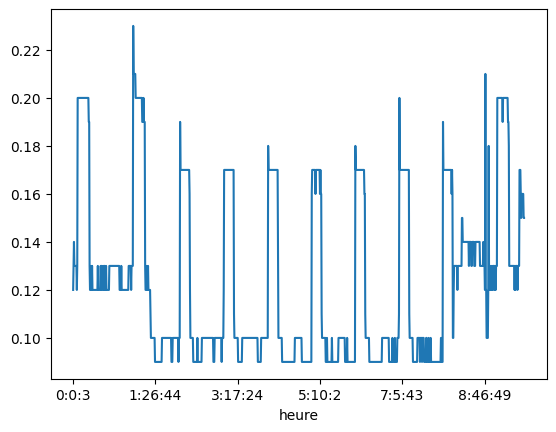

In [2305]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [2306]:
time = conso_data['dates']
time


0        2024-03-07 01:47:49.329098
1        2024-03-07 01:48:15.572098
2        2024-03-07 01:48:41.457098
3        2024-03-07 01:49:07.211098
4        2024-03-07 01:49:32.985098
                    ...            
168868   2024-04-22 09:25:59.636098
168869   2024-04-22 09:26:21.526098
168870   2024-04-22 09:26:44.657098
168871   2024-04-22 09:27:08.408098
168872   2024-04-22 09:27:32.098098
Name: dates, Length: 168873, dtype: datetime64[ns]

In [2307]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [2308]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [2309]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

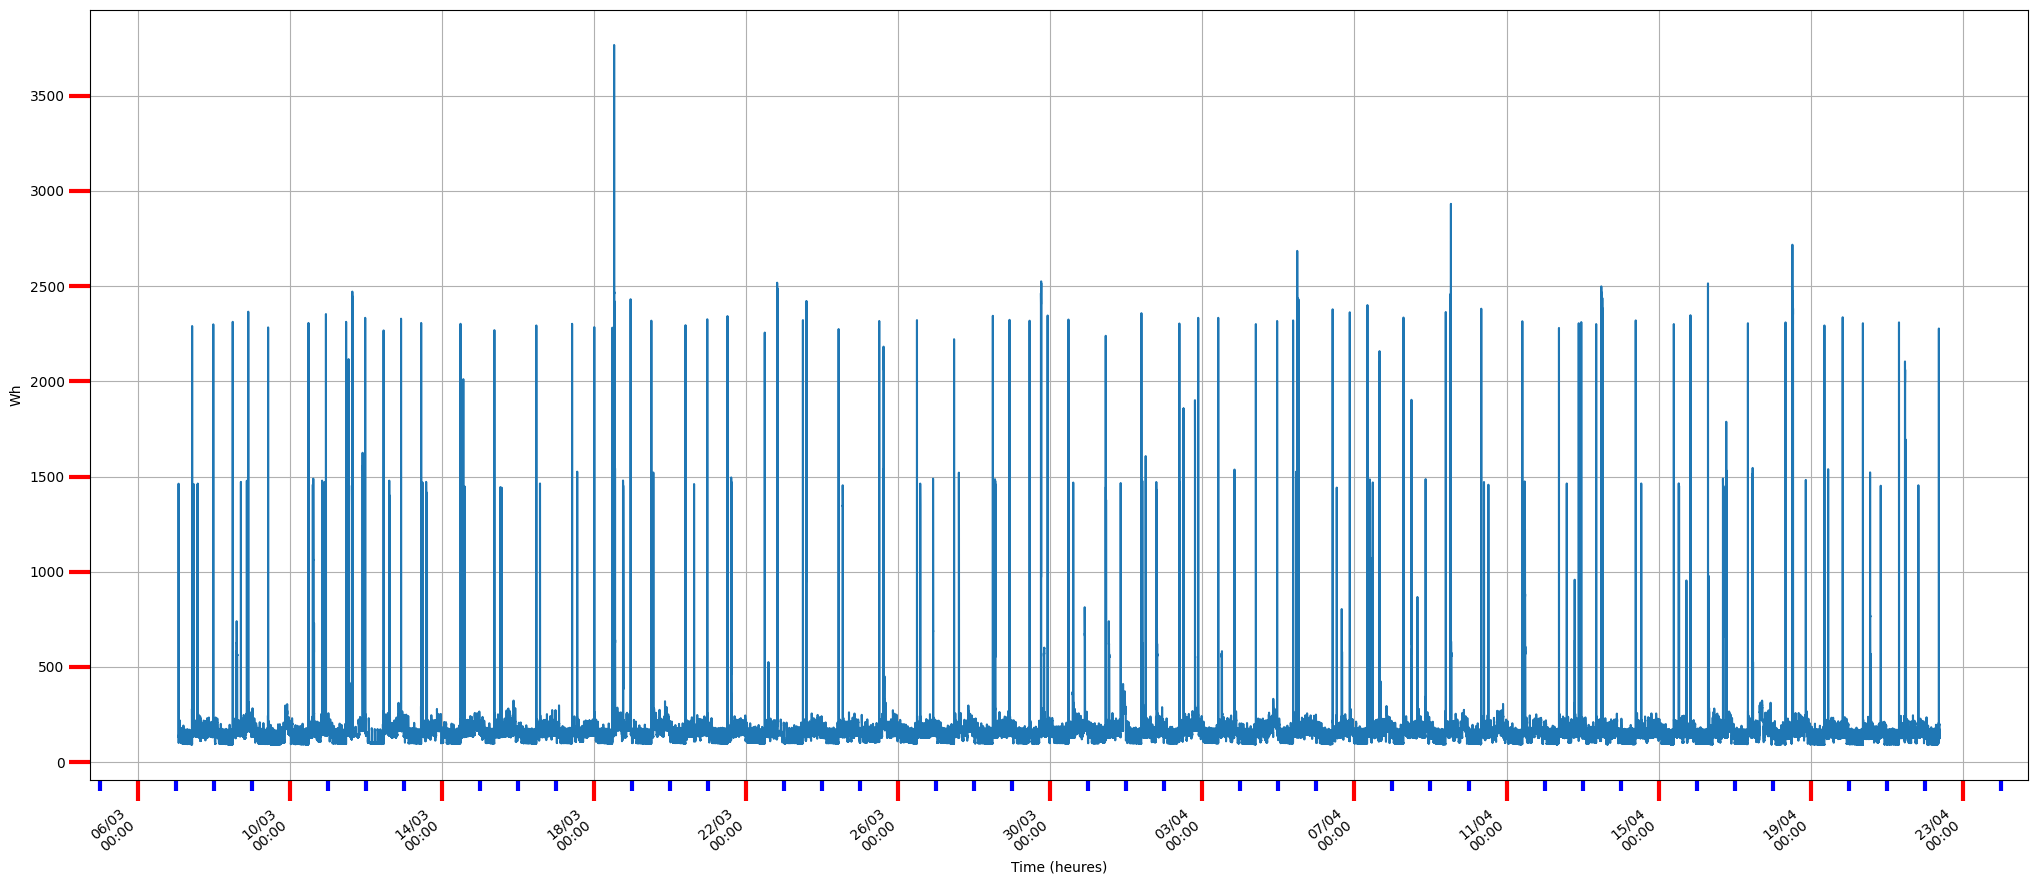

In [2310]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [2311]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
168872,23690,0.15,23.69,151.962854,4002009058,2024-04-22 09:27:32.098098,22/04/2024


In [2312]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4002009058000

# Slice of last 1 kWh

In [2313]:
l = len(conso_data)  # total watt consommés
l

168873

In [2314]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(168873, 1000)

In [2315]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [2316]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 167873     26813  0.13  26.813  134.263231  3971787443   
 167874     15269  0.23  15.269  235.771825  3971802712   
 167875     17326  0.21  17.326  207.780215  3971820038   
 167876     17453  0.21  17.453  206.268263  3971837491   
 167877     17342  0.21  17.342  207.588513  3971854833   
 ...          ...   ...     ...         ...         ...   
 168868     23193  0.16  23.193  155.219247  4001916596   
 168869     21890  0.16  21.890  164.458657  4001938486   
 168870     23131  0.16  23.131  155.635295  4001961617   
 168871     23751  0.15  23.751  151.572565  4001985368   
 168872     23690  0.15  23.690  151.962854  4002009058   
 
                             dates        days  
 167873 2024-04-22 01:03:50.483098  22/04/2024  
 167874 2024-04-22 01:04:05.752098  22/04/2024  
 167875 2024-04-22 01:04:23.078098  22/04/2024  
 167876 2024-04-22 01:04:40.531098  22/04/2024  
 167877 2024-04-22 01:04:57.873098  22

In [2317]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [2318]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [2319]:
cumtime_end,cumtime_start

(4002009058000, 3971802712000)

In [2320]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

30206346000

In [2321]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 22, 9, 27, 43, 833449),
 datetime.datetime(2024, 4, 22, 1, 4, 17, 487449),
 '22/04/2024 09:27:32')

In [2322]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:47:49.329098,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:48:15.572098,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:48:41.457098,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:49:07.211098,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:49:32.985098,07/03/2024
...,...,...,...,...,...,...,...
168868,23193,0.16,23.193,155.219247,4001916596,2024-04-22 09:25:59.636098,22/04/2024
168869,21890,0.16,21.890,164.458657,4001938486,2024-04-22 09:26:21.526098,22/04/2024
168870,23131,0.16,23.131,155.635295,4001961617,2024-04-22 09:26:44.657098,22/04/2024
168871,23751,0.15,23.751,151.572565,4001985368,2024-04-22 09:27:08.408098,22/04/2024


In [2323]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('22/04/2024 01:04:05', '22/04/2024 09:27:32')

In [2324]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-22 01:03:50.483098', '2024-04-22 09:27:32.098098')

In [2325]:
k

1

In [2326]:
data.Interval.tail(1000)

167873    26813
167874    15269
167875    17326
167876    17453
167877    17342
          ...  
168868    23193
168869    21890
168870    23131
168871    23751
168872    23690
Name: Interval, Length: 1000, dtype: int64

In [2327]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.402341111111113, 2.8563467827154514, 8, 24, 8)

In [2328]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_26500\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [2329]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
167873,26813,0.13,26.813,134.263231,3971787443,2024-04-22 01:03:50.483098,22/04/2024,2024-04-22 01:03:50.483098
167874,15269,0.23,15.269,235.771825,3971802712,2024-04-22 01:04:05.752098,22/04/2024,2024-04-22 01:04:05.752098
167875,17326,0.21,17.326,207.780215,3971820038,2024-04-22 01:04:23.078098,22/04/2024,2024-04-22 01:04:23.078098
167876,17453,0.21,17.453,206.268263,3971837491,2024-04-22 01:04:40.531098,22/04/2024,2024-04-22 01:04:40.531098
167877,17342,0.21,17.342,207.588513,3971854833,2024-04-22 01:04:57.873098,22/04/2024,2024-04-22 01:04:57.873098
...,...,...,...,...,...,...,...,...
168868,23193,0.16,23.193,155.219247,4001916596,2024-04-22 09:25:59.636098,22/04/2024,2024-04-22 09:25:59.636098
168869,21890,0.16,21.890,164.458657,4001938486,2024-04-22 09:26:21.526098,22/04/2024,2024-04-22 09:26:21.526098
168870,23131,0.16,23.131,155.635295,4001961617,2024-04-22 09:26:44.657098,22/04/2024,2024-04-22 09:26:44.657098
168871,23751,0.15,23.751,151.572565,4001985368,2024-04-22 09:27:08.408098,22/04/2024,2024-04-22 09:27:08.408098


<Axes: >

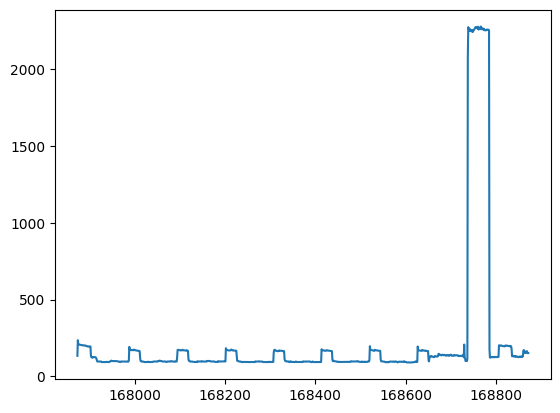

In [2330]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [2331]:
data['Wh']

167873    134.263231
167874    235.771825
167875    207.780215
167876    206.268263
167877    207.588513
             ...    
168868    155.219247
168869    164.458657
168870    155.635295
168871    151.572565
168872    151.962854
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

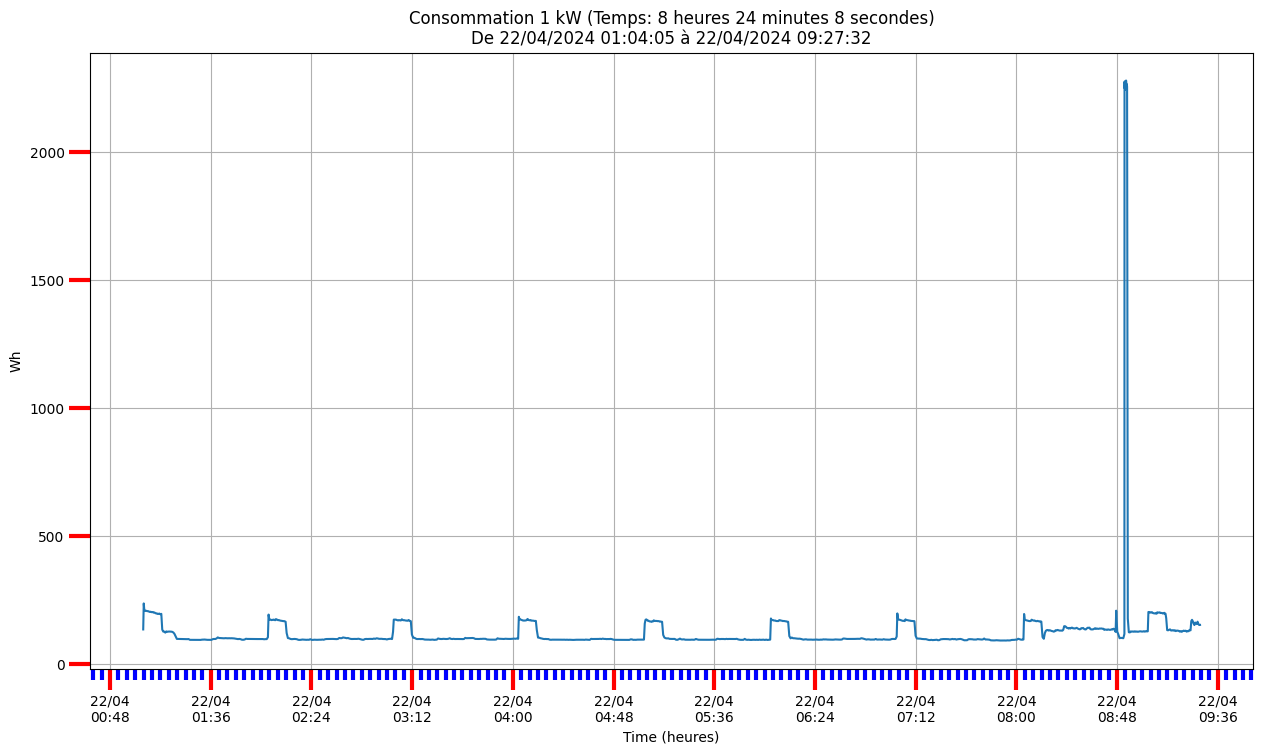

In [2332]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

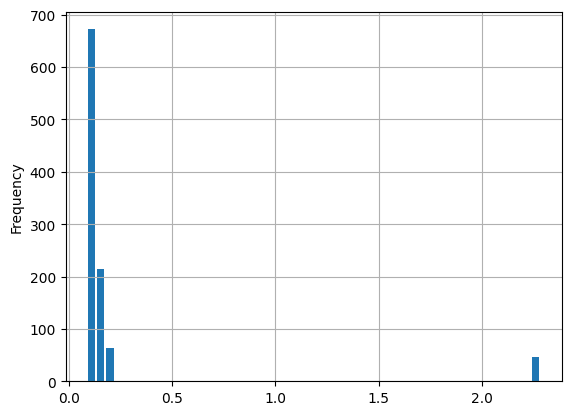

In [2333]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [2334]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
168868,23193,0.16,23.193,155.219247,4001916596,2024-04-22 09:25:59.636098,22/04/2024
168869,21890,0.16,21.890,164.458657,4001938486,2024-04-22 09:26:21.526098,22/04/2024
168870,23131,0.16,23.131,155.635295,4001961617,2024-04-22 09:26:44.657098,22/04/2024
168871,23751,0.15,23.751,151.572565,4001985368,2024-04-22 09:27:08.408098,22/04/2024
168872,23690,0.15,23.690,151.962854,4002009058,2024-04-22 09:27:32.098098,22/04/2024


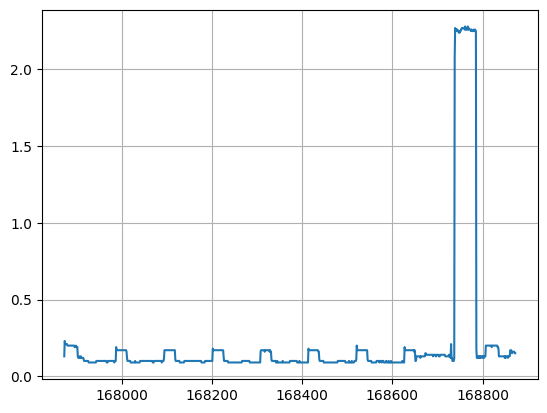

In [2335]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [2336]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(4002009058000.0, 66700.15096666667)

In [2337]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 22, 9, 27, 47, 85382),
 datetime.datetime(2024, 3, 7, 1, 47, 38, 27382))

In [2338]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(168873, 4002010, 1111.6694444444445)

In [2339]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [2340]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [2341]:
732/12 # 60 jours

61.0

In [2342]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

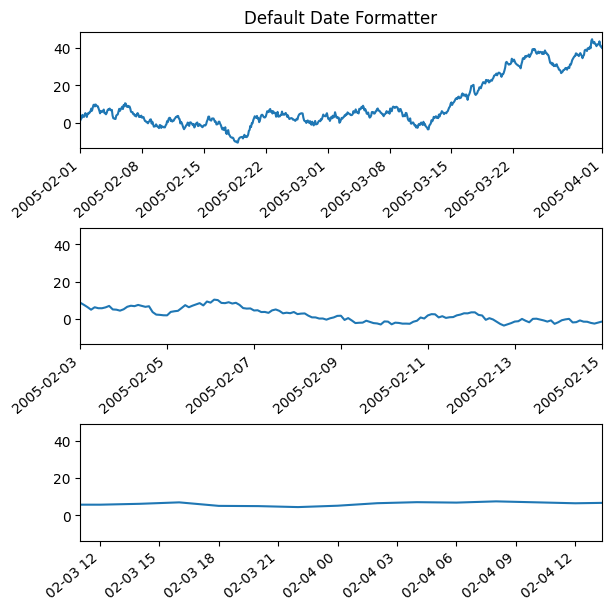

In [2343]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [2344]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)